In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'tensile-market-372300' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
No resultado dessas células, estão os querys de SQL feitos no repositório.
Para repetir o experimento, faça esses querys no repositório e cole a string que obter no lugar em que a string da célular abaixo aparece.
[this link](https://console.cloud.google.com/bigquery?j=tensile-market-372300:US:bquxjob_4458599_18532076956)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_4458599_18532076956') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT ano, tempo_emprego, quantidade_horas_contratadas, valor_remuneracao_media_sm, cbo_2002, idade, tipo_vinculo FROM `basedosdados.br_me_rais.microdados_vinculos` WHERE cbo_2002 LIKE "2611%%"OR cbo_1994="15210"


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Adição do primeiro query

job = client.get_job('bquxjob_4458599_18532076956') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()

In [ ]:
#Análise descritiva

results.describe()

,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,idade
count,1.073211e+06,1.073211e+06,1.033678e+06,1.073211e+06,1.033678e+06
mean,2.010517e+03,4.997214e+01,3.756754e+01,6.114564e+00,3.508168e+01
std,6.858376e+00,7.309870e+01,7.619682e+00,7.922389e+00,1.101663e+01
min,1.985000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.007000e+03,7.600000e+00,3.000000e+01,1.850000e+00,2.700000e+01
50%,2.011000e+03,2.190000e+01,4.000000e+01,3.700000e+00,3.300000e+01
75%,2.016000e+03,5.830000e+01,4.400000e+01,7.200000e+00,4.200000e+01
max,2.020000e+03,5.999000e+02,6.000000e+01,1.499700e+02,1.000000e+02


In [ ]:
sns.heatmap(results.corr(), annot=True)

## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
#importar bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import csv
import pandas as pd

In [ ]:
#Para plotagem

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

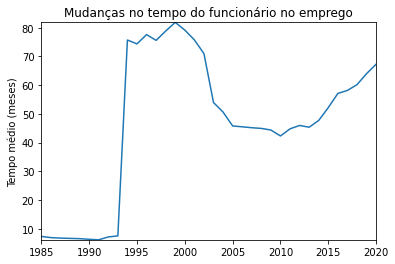

In [ ]:
#Tempo médio do funcionário na empresa

fig, ax = plt.subplots()
groupbyyear = results.loc[:, ['ano', 'tempo_emprego', 'quantidade_horas_contratadas', 'valor_remuneracao_media_sm', 'idade']].groupby('ano')
avgs = groupbyyear.mean()
x = avgs.index
y = avgs.tempo_emprego
a = np.asarray(y)
plot(x, y, ax, 'Mudanças no tempo do funcionário no emprego', 'Tempo médio (meses)')
pd.DataFrame(a).to_csv('tempo.csv', sep = ';', header  = ['tempo_emprego'])

In [ ]:
#Preparação idade
idadeusar = results.dropna(subset=['idade'])

In [ ]:
#Busca de fatores nulos
results.isnull().sum()

ano                                 0
tempo_emprego                       0
quantidade_horas_contratadas    39533
valor_remuneracao_media_sm          0
cbo_2002                        83736
idade                           39533
tipo_vinculo                      255
dtype: int64

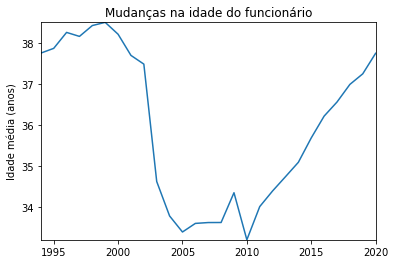

In [ ]:
#Idade

fig, ax = plt.subplots()
groupbyyear = idadeusar.loc[:, ['ano', 'tempo_emprego', 'quantidade_horas_contratadas', 'valor_remuneracao_media_sm', 'idade']].groupby('ano')
avgs = groupbyyear.mean()
x1 = avgs.index
y1 = avgs.idade
a1 = np.asarray(y1)
plot(x1, a1, ax, 'Mudanças na idade do funcionário', 'Idade média (anos)')
pd.DataFrame(a1).to_csv('idade.csv', sep = ';', header  = ['idade'])

In [ ]:
#Preparação para análise de horas contratadas

horasusar = results.dropna(subset=['quantidade_horas_contratadas'])

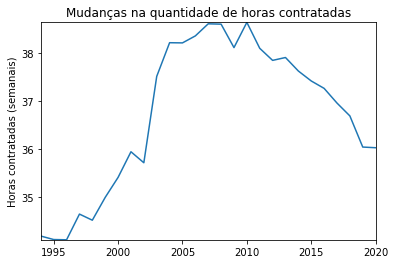

In [ ]:
# Análise de horas contratadas

fig, ax = plt.subplots()
groupbyyear = horasusar.loc[:, ['ano', 'tempo_emprego', 'quantidade_horas_contratadas', 'valor_remuneracao_media_sm', 'idade']].groupby('ano')
avgs = groupbyyear.mean()
x2 = avgs.index
y2 = avgs.quantidade_horas_contratadas
a2 = np.asarray(y2)
plot(x2, a2, ax, 'Mudanças na quantidade de horas contratadas', 'Horas contratadas (semanais)')
pd.DataFrame(a2).to_csv('horas.csv', sep = ';', header  = ['quantidade_horas_contratadas'])

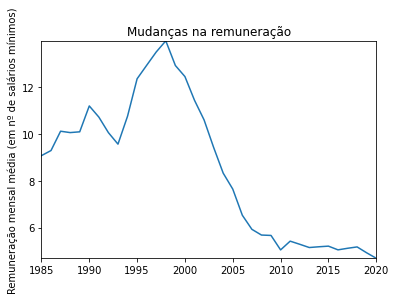

In [ ]:
# Análise de remuneração

fig, ax = plt.subplots()
groupbyyear = results.loc[:, ['ano', 'tempo_emprego', 'quantidade_horas_contratadas', 'valor_remuneracao_media_sm', 'idade']].groupby('ano')
avgs = groupbyyear.mean()
x3 = avgs.index
y3 = avgs.valor_remuneracao_media_sm
a3 = np.asarray(y3)
plot(x3, a3, ax, 'Mudanças na remuneração', 'Remuneração mensal média (em nº de salários mínimos)')
pd.DataFrame(a3).to_csv('salário.csv', sep = ';', header  = ['remuneracao'])

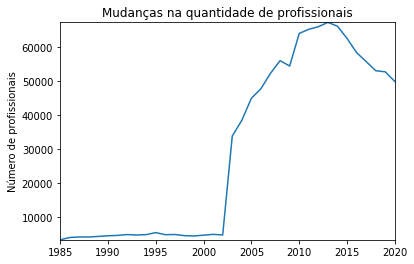

In [ ]:
#Análise do número de profissionais

fig, ax = plt.subplots()
counts1 = groupbyyear.ano.value_counts()
a4 = np.asarray(counts1)
plot(x, a4, ax, 'Mudanças na quantidade de profissionais', 'Número de profissionais')
pd.DataFrame(a4).to_csv('profissionais.csv', sep = ';', header = ['total'])

In [ ]:
#Adição do segundo Query - apenas trabalho precário

job = client.get_job('bquxjob_a1d869a_1853333474d') # Job ID inserted based on the query results selected to explore
print(job.query)
job = client.get_job('bquxjob_a1d869a_1853333474d') # Job ID inserted based on the query results selected to explore
results1 = job.to_dataframe()

SELECT ano, tipo_vinculo FROM `blotta.blotta1` WHERE tipo_vinculo='95' OR tipo_vinculo='90' OR tipo_vinculo='50' OR tipo_vinculo='40' OR tipo_vinculo='5' OR tipo_vinculo='4' OR tipo_vinculo='3'


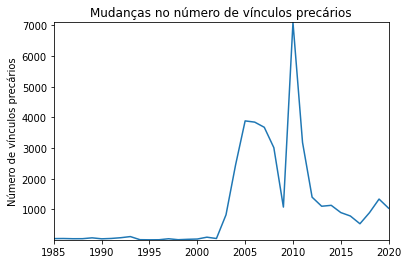

In [ ]:
#Análise do número de vínculos precários

fig, ax = plt.subplots()
groupbyyear = results1.loc[:, ['ano', 'tipo_vinculo']].groupby('ano')
avgs = groupbyyear.mean()
x_1 = avgs.index
counts2 = groupbyyear.ano.value_counts()
a5 = np.asarray(counts2)
plot(x_1, a5, ax, 'Mudanças no número de vínculos precários', 'Número de vínculos precários')
pd.DataFrame(a5).to_csv('precários.csv', sep = ';', header = ['total'])

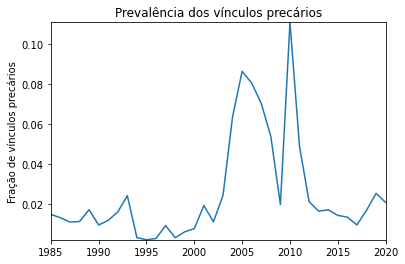

In [ ]:
#Análise da prevalência de vínculos precários

fig, ax = plt.subplots()
a6 = a5/a4
plot(x_1, a6, ax, 'Prevalência dos vínculos precários', 'Fração de vínculos precários')
pd.DataFrame(a6).to_csv('precários_prevalencia.csv', sep = ';', header = ['fracao'])

In [ ]:
# Adição do terceiro Query - apenas assessoria de imprensa

job = client.get_job('bquxjob_10952bc6_185337ece41') # Job ID inserted based on the query results selected to explore
print(job.query)
job = client.get_job('bquxjob_10952bc6_185337ece41') # Job ID inserted based on the query results selected to explore
results2 = job.to_dataframe()

SELECT ano FROM `blotta.blotta1` WHERE cbo_2002='261110'


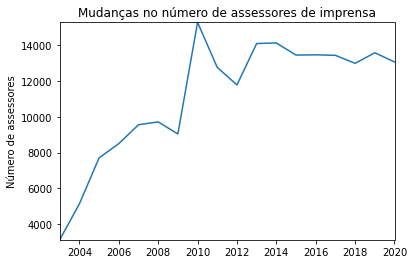

In [ ]:
#Análise do número de assessores de imprensa

fig, ax = plt.subplots()
groupbyyear = results2.loc[:, ['ano']].groupby('ano')
avgs = groupbyyear.mean()
x_2 = avgs.index
counts3 = groupbyyear.ano.value_counts()
a7 = np.asarray(counts3)
plot(x_2, a7, ax, 'Mudanças no número de assessores de imprensa', 'Número de assessores')
pd.DataFrame(a7).to_csv('assessores.csv', sep = ';', header = ['total'])

In [ ]:
#Preparação para análise de prevalência

results2.describe()

,ano
count,200723.000000
mean,2012.744967
std,4.690258
min,2003.000000
25%,2009.000000
50%,2013.000000
75%,2017.000000
max,2020.000000
